<a href="https://colab.research.google.com/github/ktakita1011/202308_beastcup_stats/blob/main/beastcup%E7%B5%B1%E8%A8%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib
!pip install ptitprince

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib


In [3]:
from bs4 import BeautifulSoup    # importする
file_path ='/content/20230819BeastCup -DRIVE- _ Tonamel.html'
hoge_html = open(file_path,'r')
soup = BeautifulSoup(hoge_html, "html.parser")

htmlからデータ取得

In [4]:


# import re
# # 3桁から5桁の数字を抽出する正規表現パターン
# pattern = re.compile(r'\b\d{4,5}\b')

# numbers = []

# #
# # 'data-v-2eabc1da'属性を持つspanタグを検索
# for span in soup.find_all('span', attrs={'data-v-2eabc1da': True}):
#     match = pattern.search(span.text)
#     if match:
#         numbers.append(match.group())

# numbers = numbers[1::2]

In [5]:
names = []
for element in soup.find_all('p', attrs={ 'class': 'entry-name' }):    # すべてのliタグを検索して表示
    names.append(element.text)

scraped_numbers = []

# 'data-v-2eabc1da'属性を持つspanタグを検索
for span in soup.find_all('span', attrs={'data-v-3c1b08f4': "", 'data-v-2eabc1da': "true"}):
    scraped_numbers.append(span.text)
#entry_name, user_code, LP
user_codes = scraped_numbers[1::3]
leage_points = scraped_numbers[2::3]
online_id = scraped_numbers[0::3]

scraped_charas = []
for span in soup.find_all('span', {'data-v-3c1b08f4': "", 'data-v-7351d753': "true"}):
    scraped_charas.append(span.text)

#重複データ削除
charas = scraped_charas[1::2]
ranks = scraped_charas[0::2]

beast_cup_df = pd.DataFrame({'user_codes':user_codes, 'leage_points':leage_points, 'online_id':online_id, 'rank':ranks, 'charas':charas})
beast_cup_df['leage_points'] = beast_cup_df['leage_points'].astype(int)
beast_cup_df.to_csv('beast_cup_df.csv', encoding='utf-8')

In [6]:
beast_cup_df['rank'].unique()

array(['ゴールド', 'プラチナ', 'マスター', 'ダイアモンド', 'シルバー', 'ルーキー〜アイアン', 'ブロンズ'],
      dtype=object)

# 可視化コード

## ランク別人数

<Axes: xlabel='rank', ylabel='count'>

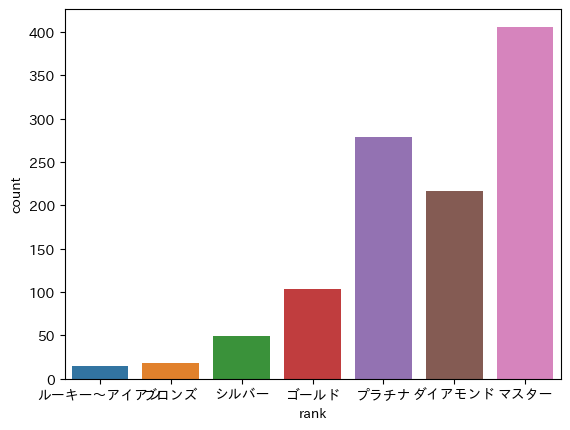

In [7]:
rank_order = ['ルーキー〜アイアン', 'ブロンズ','シルバー', 'ゴールド', 'プラチナ', 'ダイアモンド', 'マスター']
rank_lp_dict = {
    'ルーキー〜アイアン':[0, 2999],
    'ブロンズ':[3000, 4999],
    'シルバー':[5000, 8999],
    'ゴールド':[9000, 12999],
    'プラチナ':[13000, 18999],
    'ダイアモンド':[19000, 24999],
    'マスター':[25000, 99999]
}
sns.countplot(x=beast_cup_df['rank'], order=rank_order)

## ランク別キャラ数

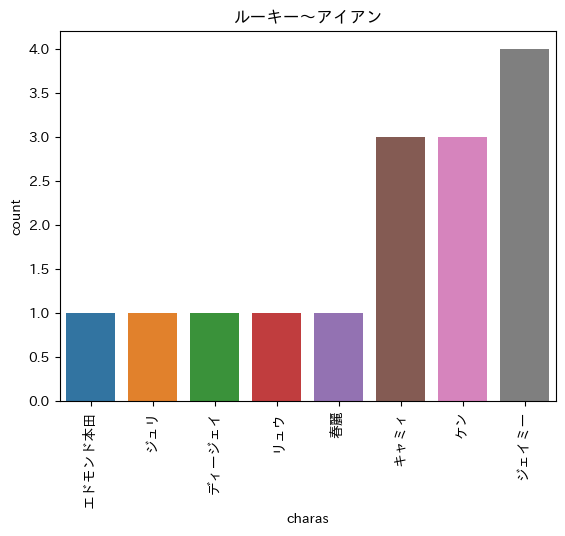

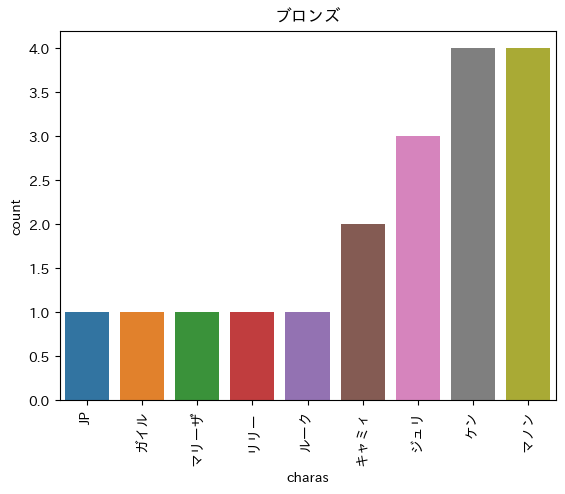

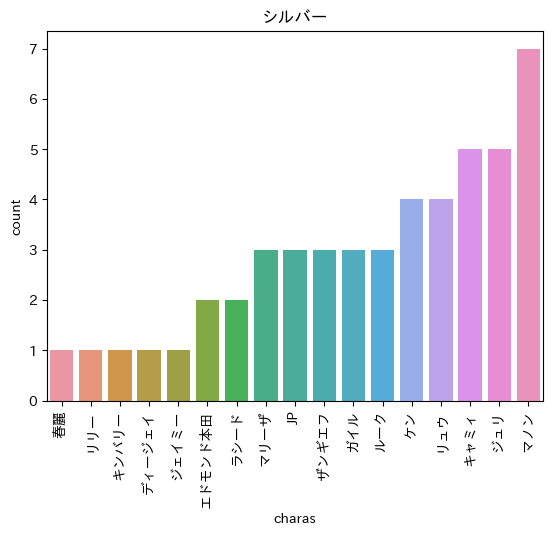

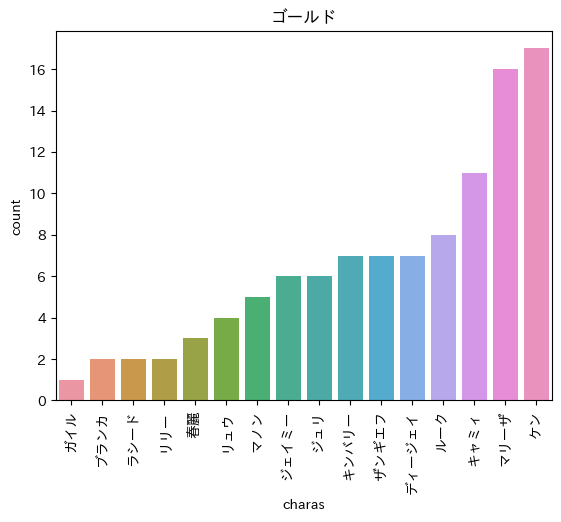

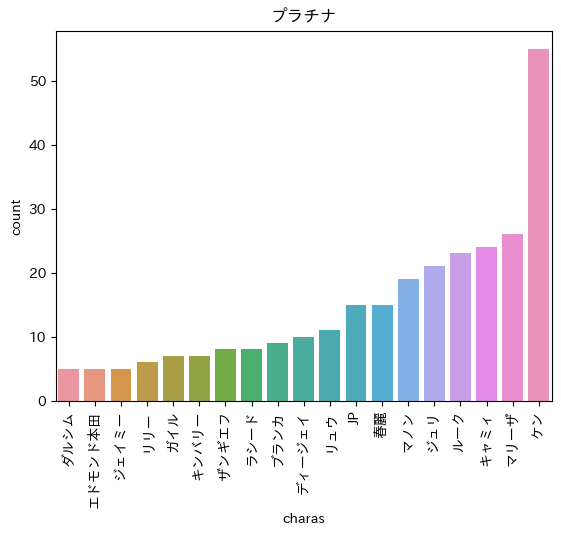

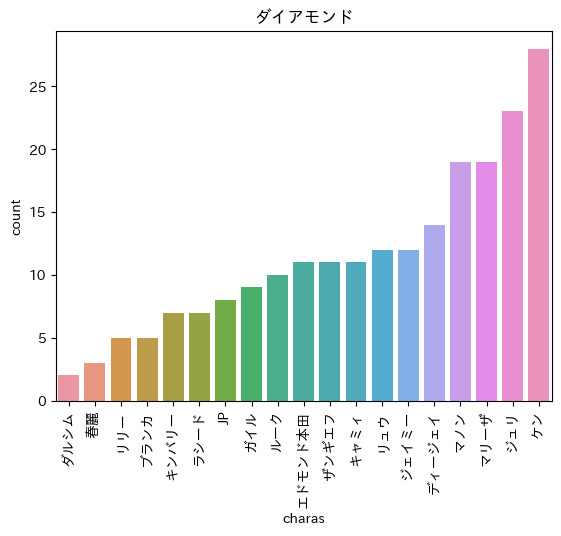

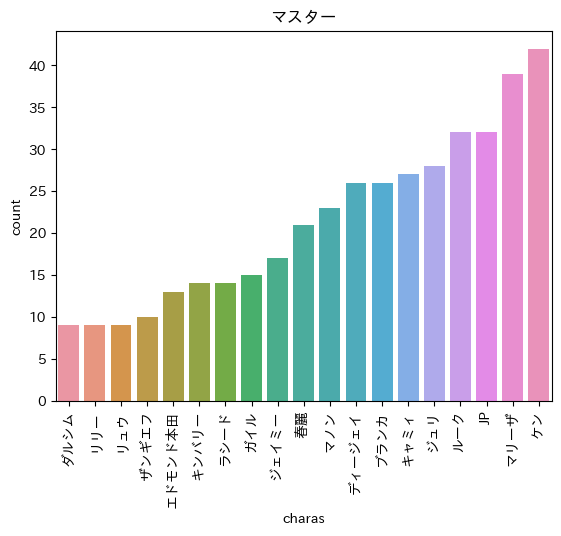

In [8]:
for rank in rank_order:
    _df = beast_cup_df[beast_cup_df['rank']==rank]
    chara_order = _df.groupby('charas').count().sort_values(by='rank').index.to_list()
    plt.title(rank)
    sns.countplot(x=_df['charas'], order=chara_order)
    plt.xticks(rotation=90)
    plt.show()

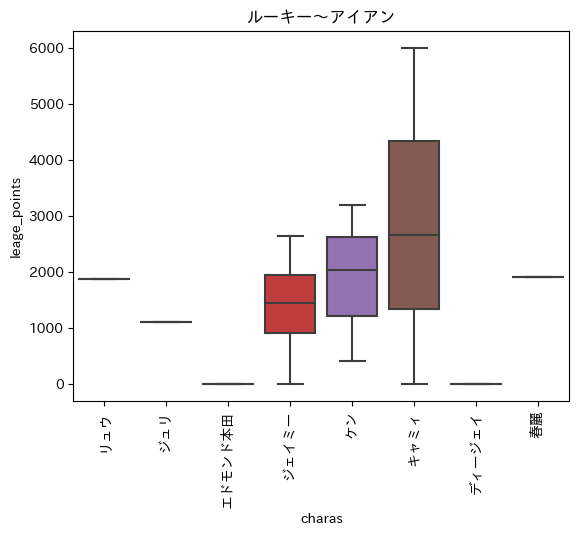

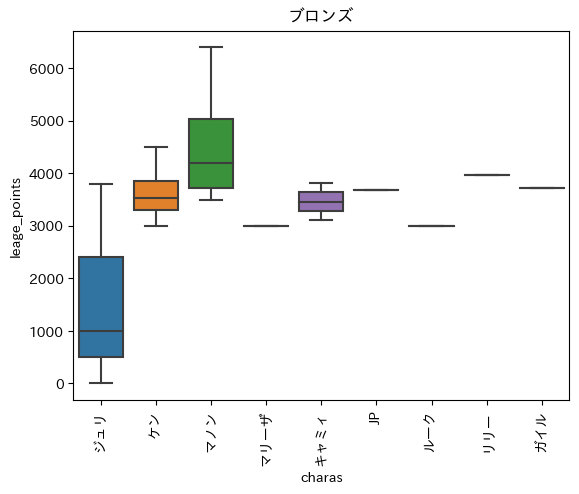

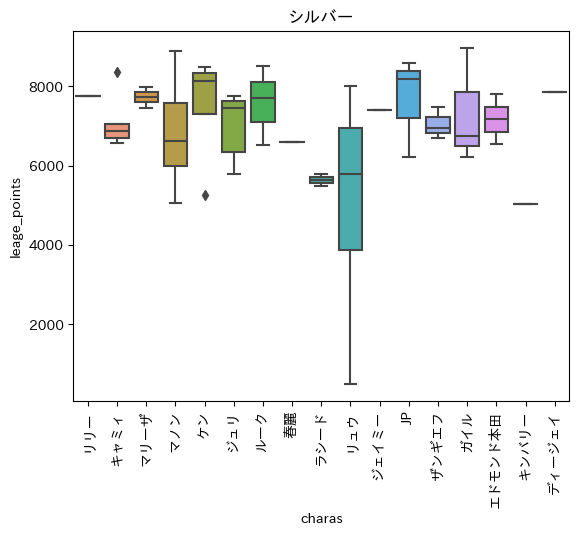

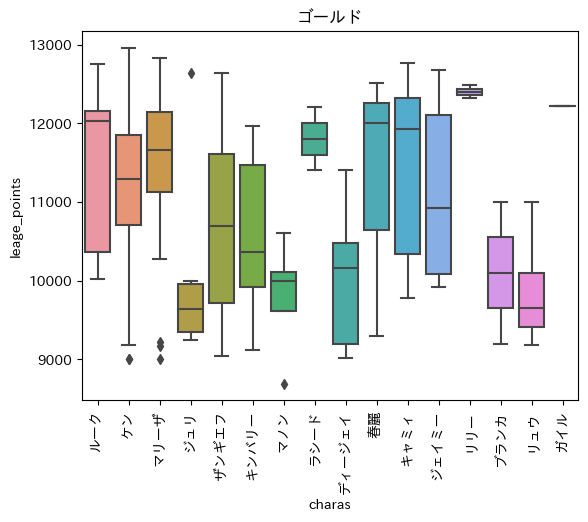

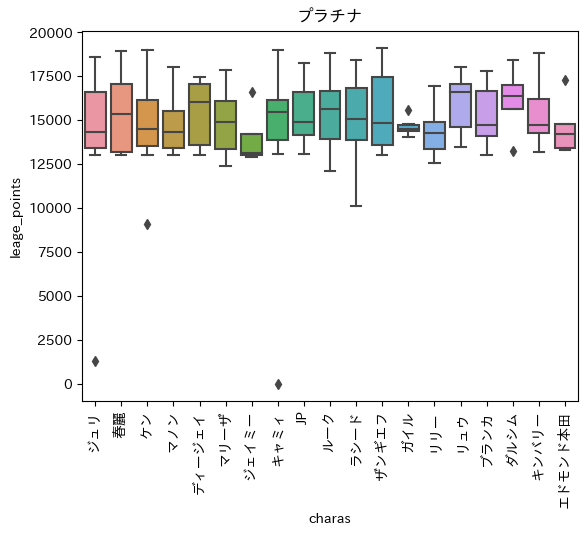

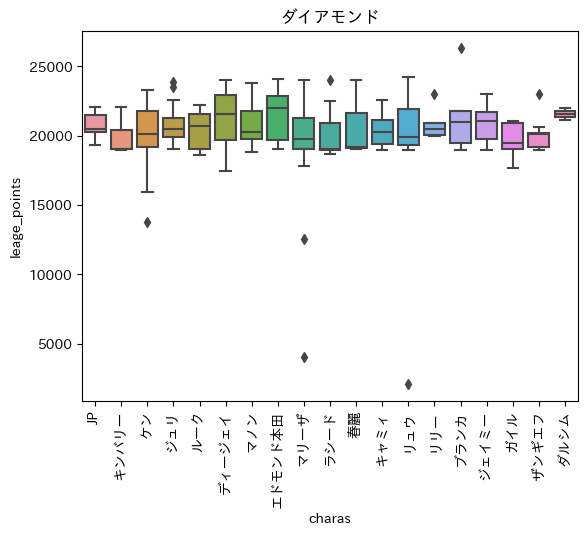

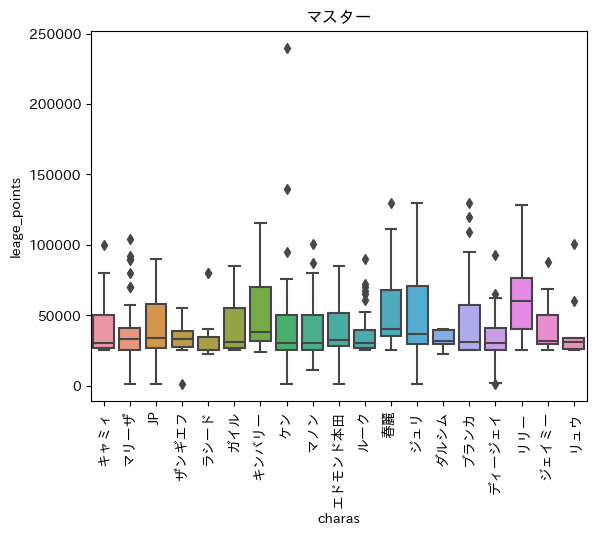

In [9]:
for rank in rank_order:
    _df = beast_cup_df[beast_cup_df['rank']==rank]
    plt.title(rank)
    sns.boxplot(data=_df,x='charas', y='leage_points')
    plt.xticks(rotation=90)
    plt.show()

## ランク別LP統計

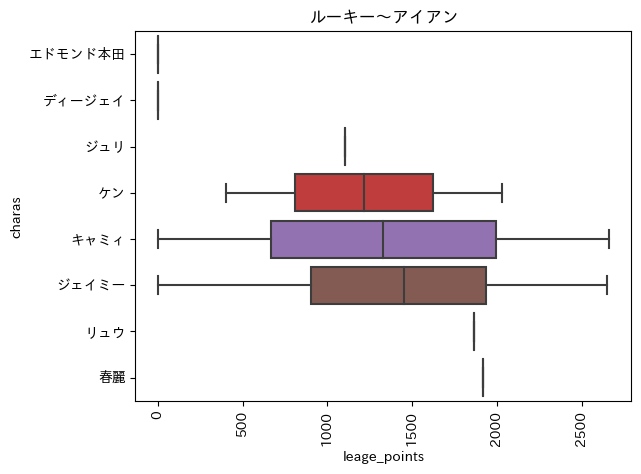

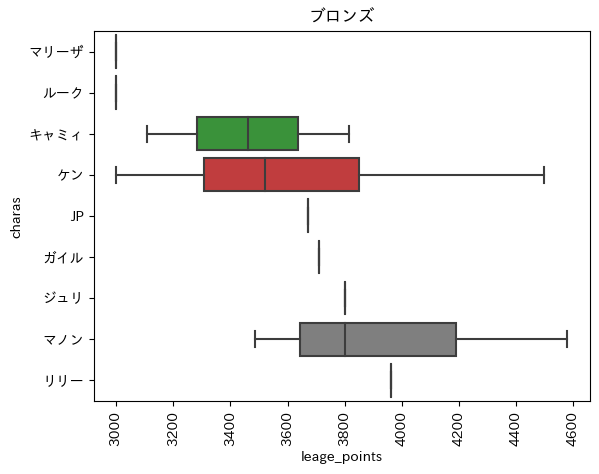

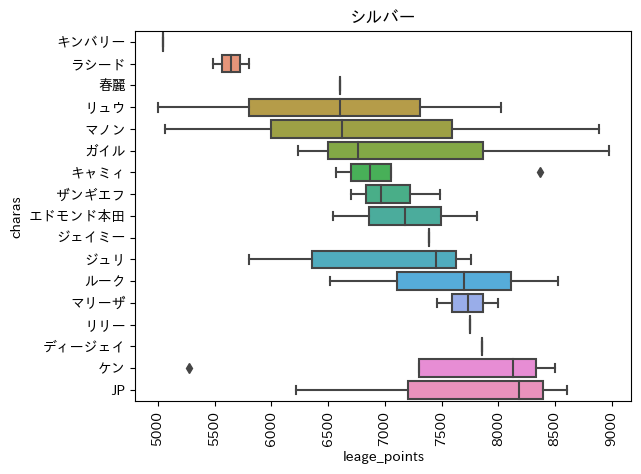

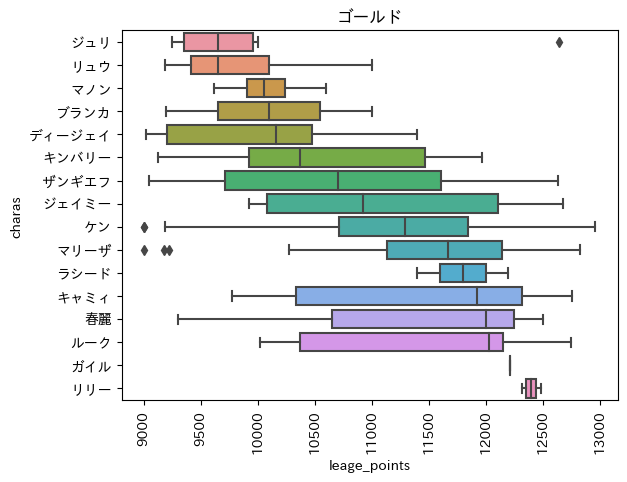

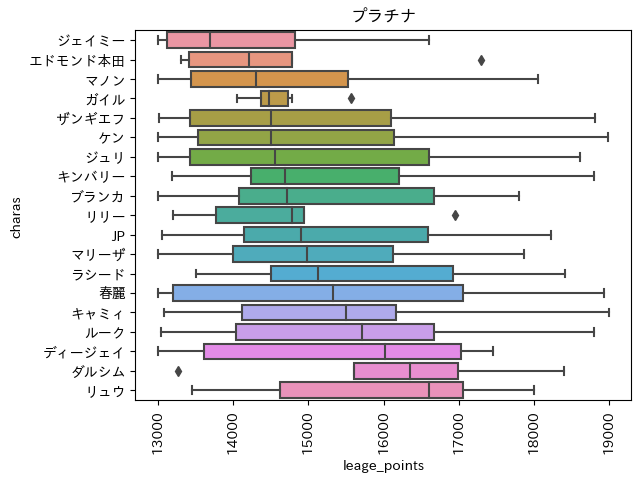

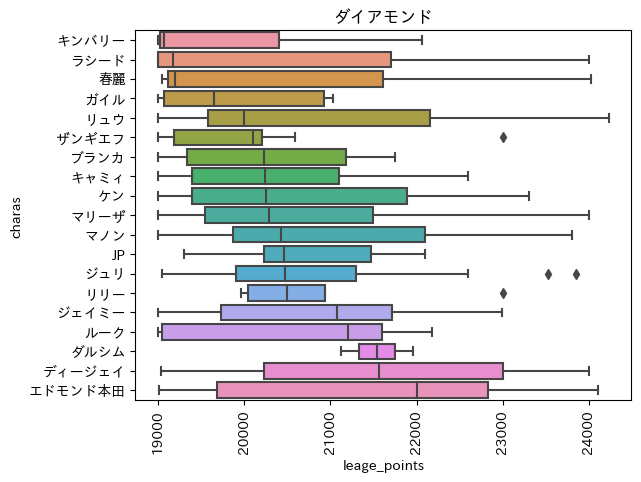

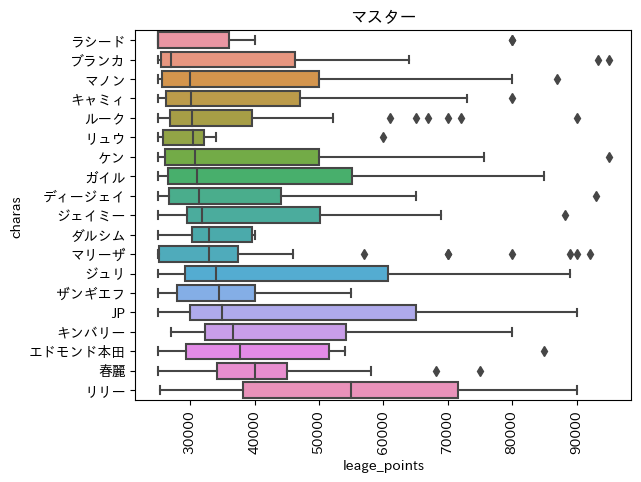

In [10]:
from ptitprince import RainCloud


for rank in rank_order:
    lp_min = rank_lp_dict[rank][0]
    lp_max = rank_lp_dict[rank][1]
    _df = beast_cup_df[beast_cup_df['rank']==rank]
    _df = _df[(lp_min<=_df['leage_points']) & (_df['leage_points']<=lp_max)]
    chara_order = _df.groupby('charas')['leage_points'].median().sort_values().index.to_list()
    plt.title(rank)
    sns.boxplot(data=_df,y='charas', x='leage_points',order=chara_order)
    plt.xticks(rotation=90)
    plt.show()

In [11]:
_df.groupby('charas')['leage_points'].median()

charas
JP         35000.0
エドモンド本田    37775.0
ガイル        31000.0
キャミィ       30059.0
キンバリー      36700.0
ケン         30821.0
ザンギエフ      34500.0
ジェイミー      31799.0
ジュリ        34039.5
ダルシム       33000.0
ディージェイ     31431.0
ブランカ       27103.0
マノン        30000.0
マリーザ       33000.0
ラシード       25054.0
リュウ        30424.0
リリー        55000.0
ルーク        30248.0
春麗         40000.0
Name: leage_points, dtype: float64

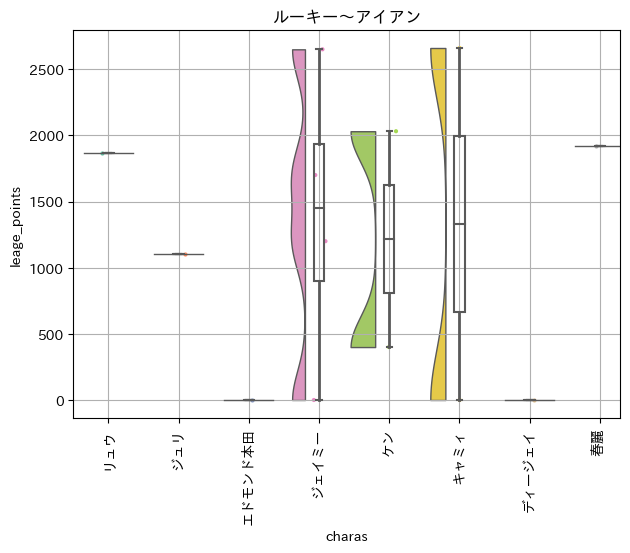

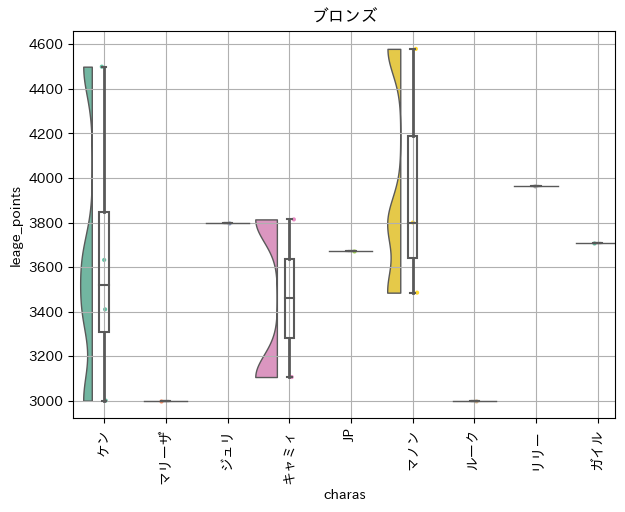

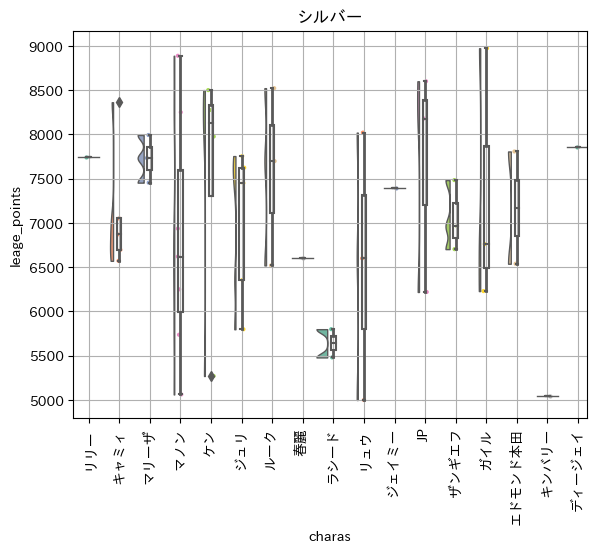

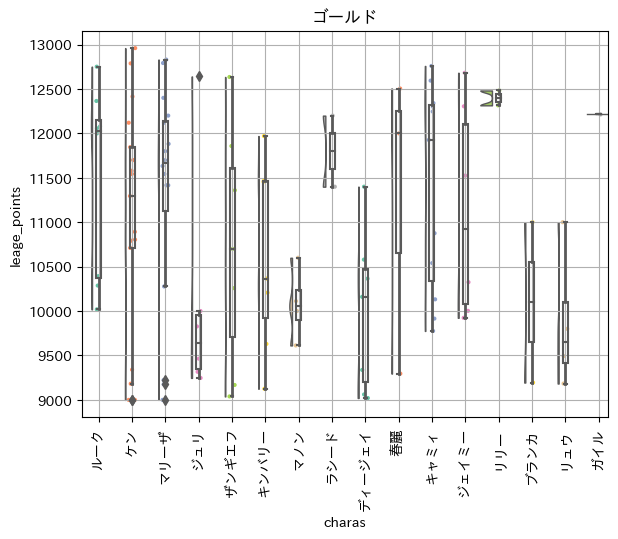

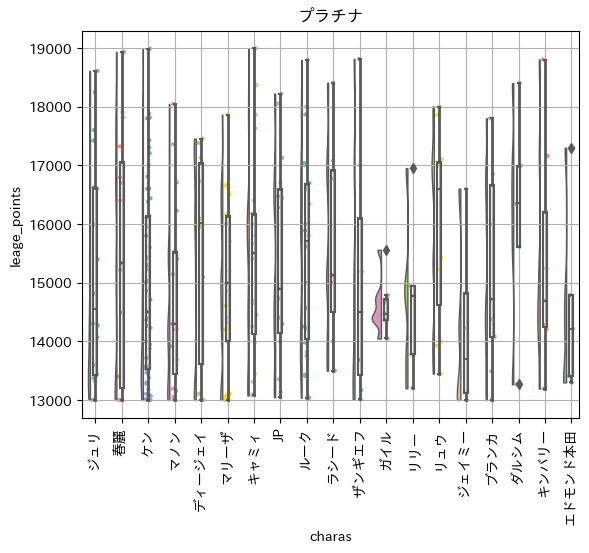

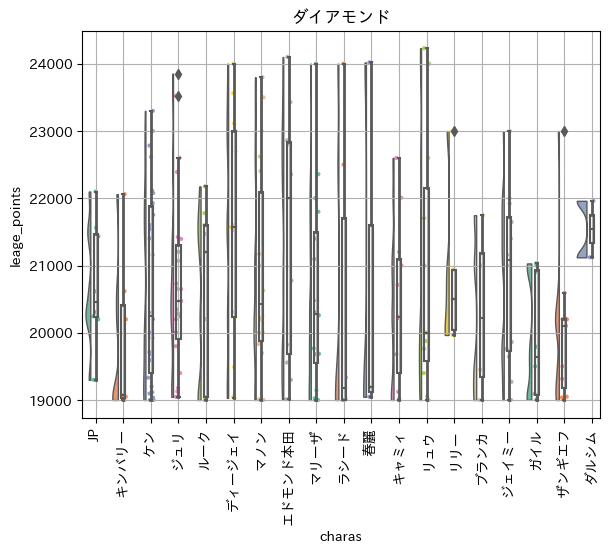

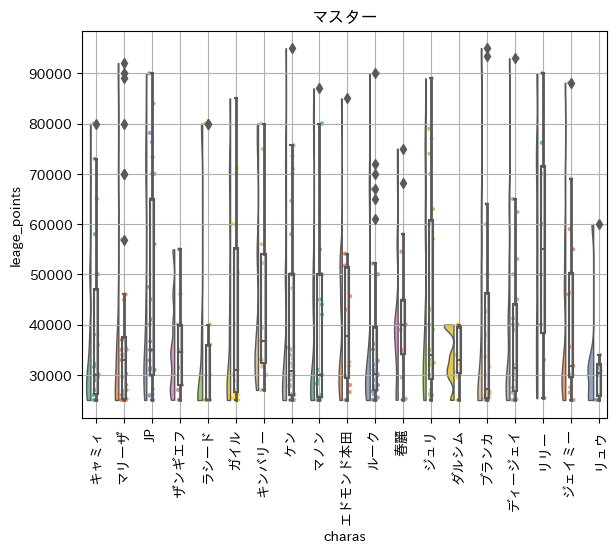

In [12]:
from ptitprince import RainCloud


for rank in rank_order:

    lp_min = rank_lp_dict[rank][0]
    lp_max = rank_lp_dict[rank][1]
    _df = beast_cup_df[beast_cup_df['rank']==rank]
    _df = _df[(lp_min<=_df['leage_points']) & (_df['leage_points']<=lp_max)]

    fig, ax = plt.subplots()#figsize=(12, 6)
    RainCloud(data=_df, x="charas", y="leage_points", ax=ax)
    ax.set_title(rank)
    fig.tight_layout()
    plt.xticks(rotation=90)
    ax.grid()
    plt.show()